In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, entropy
from skimage.feature import graycomatrix, graycoprops
import seaborn as sns
import pandas as pd


In [31]:
image = cv2.imread('/media/williancarddd/NVME/projects/malaria-pibiti/1_entrada/Dataset01_95.0/images/1-63-1-1.bmp')
image_gay = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [32]:
# processamento de imagem
image_contrast = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Conversão para o espaço de cor HSV
image_hsv = cv2.cvtColor(image_contrast, cv2.COLOR_BGR2HSV)

# Extração do componente S
s_component = image_hsv[:, :, 1]


# Aplicação de filtro test
s_filtered_median = cv2.medianBlur(s_component, 3)



Text(0.5, 1.0, 'FB')

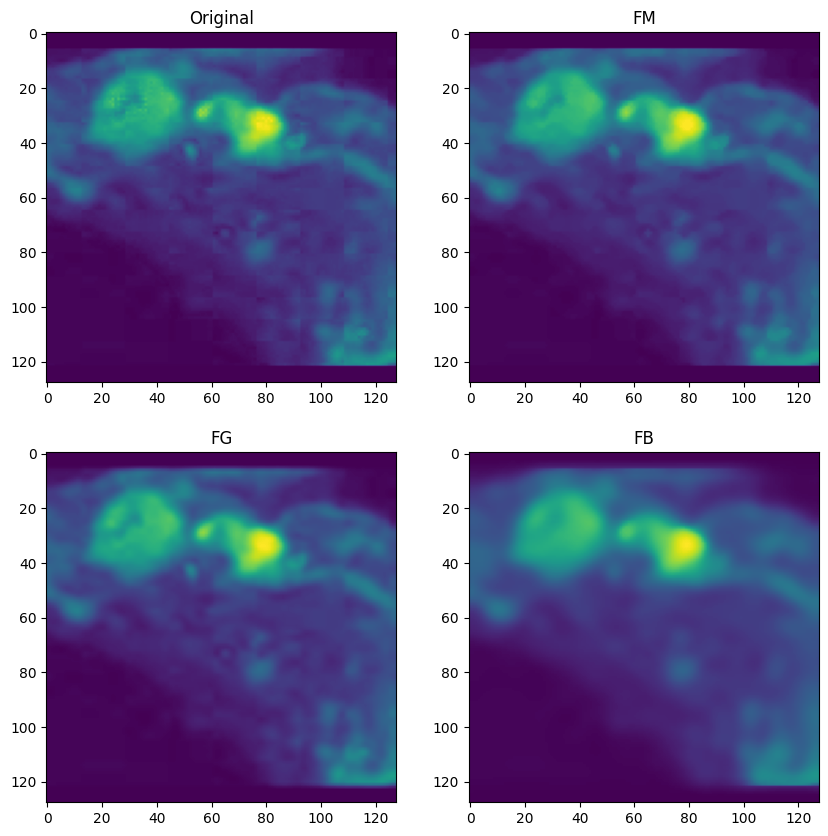

In [33]:
# Exibição da imagem processada
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(s_component)
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(s_filtered_median)
plt.title('FM')

plt.subplot(2, 2, 3)
plt.imshow(s_filtered_gaussian)
plt.title('FG')

plt.subplot(2, 2, 4)
plt.imshow(s_filtered_bilateral)
plt.title('FB')

Text(0.5, 1.0, 'S Component Filtered')

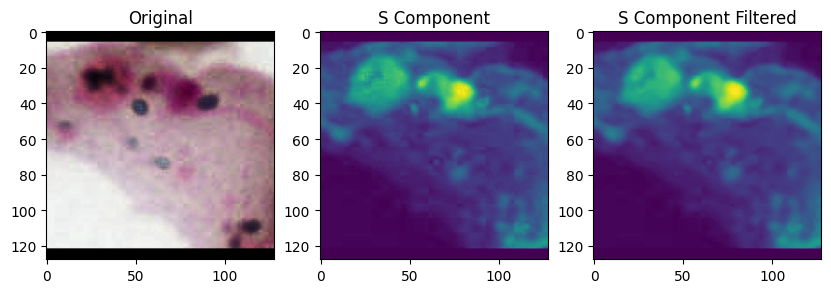

In [34]:
# show image original, s_component and s_filtered_median
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)

plt.imshow(image)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(s_component)
plt.title('S Component')

plt.subplot(1, 3, 3)
plt.imshow(s_filtered_median)
plt.title('S Component Filtered')




In [35]:
def histogram_features(image):
    # Calcula o histograma da imagem
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    
    # Calcula as características
    mean = np.mean(hist)
    std_dev = np.std(hist)
    energy = np.sum(hist ** 2)
    skewness = skew(hist)
    entropy_val = entropy(hist)
    smoothness = 1 - (1 / (1 + std_dev ** 2))
    kurt = kurtosis(hist)
    
    features = {
        'Mean': mean,
        'Standard Deviation': std_dev,
        'Energy': energy,
        'Skewness': skewness,
        'Entropy': entropy_val,
        'Smoothness': smoothness,
        'Kurtosis': kurt
    }
    
    return features


def glcm_features(image):

    
    # Calcula a GLCM
    glcm = graycomatrix(image, [1], [0], 256, symmetric=True, normed=True)
    
    # Calcula as propriedades da GLCM
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    features = {
        'Contrast': contrast,
        'Dissimilarity': dissimilarity,
        'Homogeneity': homogeneity,
        'Energy': energy,
        'Correlation': correlation
    }
    
    return features




In [36]:
features = histogram_features(s_filtered_median)
print("Características Histograma:")
for key, value in features.items():
    print(f"{key}: {value}")



glcm_features = glcm_features(image_gay)

print("GLCM Features:")
for key, value in glcm_features.items():
    print(f"{key}: {value}")

Características Histograma:
Mean: 0.00390625
Standard Deviation: 0.008574634790420532
Energy: 0.022728487849235535
Skewness: 7.630061428851931
Entropy: 4.5863980098262624
Smoothness: 7.35189563547678e-05
Kurtosis: 71.98136907738724
GLCM Features:
Contrast: 28.915292814960626
Dissimilarity: 3.297920767716535
Homogeneity: 0.4055109873460818
Energy: 0.10633938781926167
Correlation: 0.9970208077499955


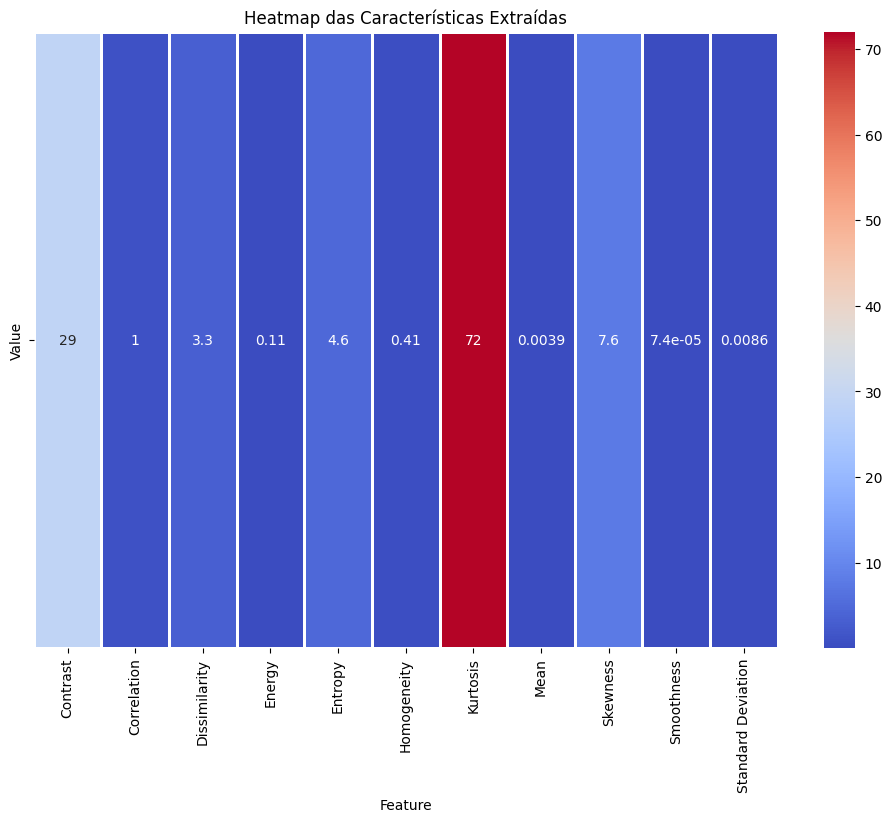